# Investors side 
### Average returns, and sharpe ratios

In [81]:
import pandas as pd
import numpy as np
import requests
import datetime as dt
import time
import math
from pypfopt import expected_returns, risk_models
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
df1 = pd.read_excel('merged_final.xlsx')

In [69]:
tick_ca = list(df1['ticker'][df1['asset_class'] == 'cryptoasset'])

## IPOs
## Function to compute returns given period windows

In [76]:
#para
list_period = [30,60,180,270,365]

In [77]:
adj = pd.read_excel('adj_close_664.xlsx')
tick_ipo = list(df1['ticker'][df1['asset_class'] == 'IPO'])

In [78]:
## long term 
'''
This function since only computes returns, is not working with dates as index.
In case just change the ix+z with the timedelta function.
'''
total = []
for z in list_period :

    daysprices = pd.DataFrame()

    for k in tick_ipo:
        ix = adj[k].first_valid_index()
    
        temp = list(adj[k][ix:ix+z])
        if len(temp)>=z:
            daysprices[k] = temp
    
    
    daysreturns = pd.DataFrame()
#the try except is needed because of some problem with nan

    for k in daysprices.columns:
        ix = adj[k].first_valid_index()
    
        temp = list(adj[k][ix:ix+z])
        if len(temp)<z:
            temp = temp.append([np.nan] * (z-len(temp)))
    
        daysreturns[k] = temp
        try:
            #Uncomment only one 
            #daysreturns[k] = np.log(daysreturns[k]) - np.log(daysreturns[k].shift(1))
            daysreturns[k] = daysreturns[k].pct_change(1)
        except:
            daysreturns[k] = [np.nan]*z
        
    returns_afterd =[]

    for x in list(daysreturns.columns):
        returns_afterd.append((1+daysreturns[x]).cumprod()[z-1]) 

    returns_afterd = [x for x in returns_afterd if math.isnan(x) == False]
    average_ret = np.array(returns_afterd).mean()-1
    print("The average return of IPOs after {} days is {}%".format(z, round(average_ret*100,2)))
    total.append(average_ret)

The average return of IPOs after 30 days is 3.58%
The average return of IPOs after 60 days is 5.77%
The average return of IPOs after 180 days is 4.28%
The average return of IPOs after 270 days is 6.82%
The average return of IPOs after 365 days is 9.57%


## Cryptoassets
## Function to compute returns given period windows

In [180]:
#para
over = 'USD' # or 'BTC'
out = '' #or use ' NOband' to use the excel file without the outlier BAND
list_period = [30,60,90,180,270,365,480,600,720]

In [181]:
df_ca = pd.read_excel('{}_final prices cryptossets (2021-07-16){}.xlsx'.format(over,out))
tick_ca = list(df_ca.columns)[1:]

In [182]:
## long term 
'''
This function since only computes returns, is not working with dates as index.
In case just change the ix+z with the timedelta function.
'''
total = []
for z in list_period :

    daysprices = pd.DataFrame()

    for k in tick_ca:
        ix = df_ca[k].first_valid_index()
    
        temp = list(df_ca[k][ix:ix+z])
        if len(temp)>=z:
            daysprices[k] = temp
    
    
    daysreturns = pd.DataFrame()
#the try except is needed because of some problem with nan

    for k in daysprices.columns:
        ix = df_ca[k].first_valid_index()
    
        temp = list(df_ca[k][ix:ix+z])
        if len(temp)<z:
            temp = temp.append([np.nan] * (z-len(temp)))
    
        daysreturns[k] = temp
        try:
        #Uncomment only one 
        #days60returns[k] = np.log(days60returns[k]) - np.log(days60returns[k].shift(1))
            daysreturns[k] = daysreturns[k].pct_change(1)
        except:
            daysreturns[k] = [np.nan]*z
        
    returns_afterd =[]

    for x in list(daysreturns.columns):
        returns_afterd.append((1+daysreturns[x]).cumprod()[z-1]) 

    returns_afterd = [x for x in returns_afterd if math.isnan(x) == False]
    average_ret = np.array(returns_afterd).mean()-1
    print("The average return of cryptoassets over {} after {} days is {}%".format(over ,z, round(average_ret*100,2)))
    total.append(average_ret)

The average return of cryptoassets over USD after 30 days is 1601.55%
The average return of cryptoassets over USD after 60 days is 7604.68%
The average return of cryptoassets over USD after 90 days is 4846.05%
The average return of cryptoassets over USD after 180 days is 2134.68%
The average return of cryptoassets over USD after 270 days is 665.88%
The average return of cryptoassets over USD after 365 days is 632.14%
The average return of cryptoassets over USD after 480 days is 282.37%
The average return of cryptoassets over USD after 600 days is 594.77%
The average return of cryptoassets over USD after 720 days is 1966.61%


## Sharpe ratios

In [155]:
#para
days = 30
method = 'CAPM'

In [156]:
df = pd.read_excel('merged_final.xlsx')
adj = pd.read_excel('adj_close_664.xlsx')
adj.set_index('Date', inplace = True)
adj.index = pd.to_datetime(adj.index)

In [157]:
df_ca = pd.read_excel('USD_final prices cryptossets (2021-07-16).xlsx')
df_ca.set_index('dates', inplace = True)
df_ca.index = pd.to_datetime(df_ca.index)

In [158]:
tick_ca  = list(df_ca.columns)
tick_ipo = list(adj.columns)

In [159]:
df_russell = pd.read_csv('TVC_RUA, 1D.csv')
df_russell.set_index('time', inplace = True)
df_russell.index = pd.to_datetime(df_russell.index)

In [160]:
df_mktcap = pd.read_csv('CRYPTOCAP_TOTAL, 1D.csv')
df_mktcap.set_index('time', inplace = True)
df_mktcap.index = pd.to_datetime(df_mktcap.index)

In [161]:
#Execute this cell ony if want to work with no outlier.
df_ca = pd.read_excel('USD_final prices cryptossets (2021-07-16) NOband.xlsx')
df_ca.set_index('dates', inplace = True)
df_ca.index = pd.to_datetime(df_ca.index)
tick_ca  = list(df_ca.columns)

In [162]:
dicty = dict(ticker = [], asset_class = [], method = [], expected_ret= [], std = [], sharpe_ratio = [])
sharpedf = pd.DataFrame(dicty)

In [163]:
for i in df['ticker']:
    
    
    if i in tick_ipo:
        ix = adj[i].first_valid_index()
        intervall = adj[i][ix:ix+ dt.timedelta(days)]
                
        if method == 'mean_hist':
            mu = expected_returns.mean_historical_return(pd.DataFrame(intervall), frequency=days)
        elif method == 'CAPM':
            df_ = pd.DataFrame(adj[i][adj[i].first_valid_index():adj[i].first_valid_index()+ dt.timedelta(days)])
            df_['mkt']= df_russell['close'][adj[i].first_valid_index():adj[i].first_valid_index()+ dt.timedelta(days)]
            returns_df = df_.pct_change(1).dropna()
            if len(returns_df[i]):
        
                x = np.array(returns_df[i]).reshape((-1,1))
                y = np.array(returns_df['mkt'])
                model = LinearRegression().fit(x, y)
                mu = 0.01 + model.coef_*((df_['mkt'].pct_change(1) + 1).cumprod()[-1]-1 - 0.01)
                #print('Beta = ', model.coef_)
                
        try:
            
            std = (intervall.pct_change(1)).std()
            sharpe = float(mu)/ std                
            classs = 'IPO'
        except:
            mu = 0
            std =0
            sharpe = 0
            classs = 'error'
        
    elif i in tick_ca:       
        ix= df_ca[i].first_valid_index()
        intervall = df_ca[i][ix:ix+ dt.timedelta(days)]
                
        if method == 'mean_hist':
            mu = expected_returns.mean_historical_return(pd.DataFrame(intervall), frequency=days)
        elif method == 'CAPM':
            df_ = pd.DataFrame(df_ca[i][df_ca[i].first_valid_index():df_ca[i].first_valid_index()+ dt.timedelta(days)])
            df_['mkt']= df_mktcap['close'][df_ca[i].first_valid_index():df_ca[i].first_valid_index()+ dt.timedelta(days)]
            returns_df = df_.pct_change(1).dropna()
            if len(returns_df[i]) != 0:
                x = np.array(returns_df[i]).reshape((-1,1))
                y = np.array(returns_df['mkt'])
                model = LinearRegression().fit(x, y)
                mu = 0.01 + model.coef_*((df_['mkt'].pct_change(1) + 1).cumprod()[-1]-1 - 0.01)
                #print('Beta = ', model.coef_)
            
        try:
            
            std = (intervall.pct_change(1)).std()
            sharpe = float(mu)/ std                
            classs = 'cryptoasset'
        except:
            mu = 0
            std =0
            sharpe = 0
            classs = 'error'
    else:
        mu = 0
        std= 0
        sharpe = 0
        classs = 'error'
    #print(mu)
    sharpedf = sharpedf.append({'ticker' : i,
                                'asset_class': classs,
                                'method' : method,
                                'expected_ret' : float(mu),
                                'std':std,
                                'sharpe_ratio': sharpe}, ignore_index=True)
    
    



In [164]:
sharpedf[sharpedf['asset_class'] == 'cryptoasset'].describe()

,expected_ret,std,sharpe_ratio
count,256.000000,255.000000,255.000000
mean,0.012763,2.153559,0.111857
std,0.073588,18.579815,0.834675
min,-0.209171,0.011743,-3.340676
25%,-0.024533,0.090978,-0.189443
50%,0.009253,0.118410,0.046015
75%,0.040499,0.164273,0.333641
max,0.299466,203.114045,3.965551


In [165]:
sharpedf[sharpedf['asset_class'] == 'IPO'].describe()

,expected_ret,std,sharpe_ratio
count,668.000000,668.000000,668.000000
mean,0.010076,0.053368,0.398388
std,0.012986,0.081018,2.411406
min,-0.227657,0.001592,-34.980519
25%,0.009602,0.029820,0.157817
50%,0.010246,0.043432,0.232456
75%,0.011437,0.059639,0.341312
max,0.055582,1.260930,20.230157


## plot sharpe distribution

/Users/matty/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/matty/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


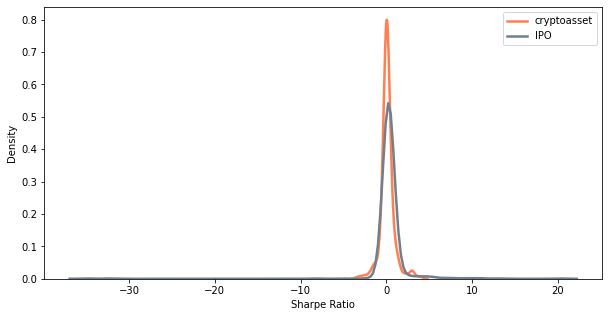

In [167]:
plt.figure(figsize=(10,5))
for k,i in [['cryptoasset','coral' ],['IPO', 'slategray']]:
    
    subset = sharpedf[sharpedf['asset_class']==k]
    
    # Draw the density plot
    sns.distplot(subset['sharpe_ratio'], hist = False, kde = True,
                 kde_kws = {'linewidth': 2.5, 'color' : i},
                 label = k )
# Plot formatting
plt.legend()
#plt.title('Density Plot ')
plt.xlabel('Sharpe Ratio')
plt.ylabel('Density')

plt.savefig

plt.savefig('images/Dist of Sharpe{} @ {} days.png'.format(method,days),  dpi=900,  transparent=True)
plt.savefig('images/Dist of Sharpe{} @ {} days.jpeg'.format(method,days),  dpi=900)


plt.show()

### Markets returns

In [37]:
std = df_russell['close']['2015':'2021'].pct_change(1).std()
mu = expected_returns.mean_historical_return(pd.DataFrame(df_russell['close']['2020']), frequency=days)
sharpe = (mu-0.01)/std

In [38]:
mu

close    0.060686
dtype: float64

In [39]:
print(round(float(sharpe),3))

4.465


In [40]:
std = df_mktcap ['close']['2015':'2021'].pct_change(1).std()
mu = expected_returns.mean_historical_return(pd.DataFrame(df_mktcap ['close']['2020']), frequency=days)
sharpe = (mu-0.01)/std

In [41]:
mu

close    0.414356
dtype: float64

In [42]:
print(round(float(sharpe),3))

9.799
